<a href="https://colab.research.google.com/github/Johar98/Machine-Learning-Algorithm/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x #this line is not required unless you are in notebook
import tensorflow as tf
from tensorflow import keras #helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #this line is not required unless you are in notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
fashion_mist = keras.datasets.fashion_mnist #this will get our data object which is load inside .loaddata() function
(train_image,train_labels),(test_images,test_labels) = fashion_mist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_image.shape #so we've got 60,000 images that are made up of 28X28 pixels (784 in total)

(60000, 28, 28)

In [4]:
type(train_image)

numpy.ndarray

In [5]:
train_image[0,23,23] #let's have a look at 1 pixels
#1 pixel value are between 0 and 255, 0 being black and 255 being white. 194 means we have a grayscale

194

In [6]:
train_labels[:10] #let look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
#our labels are integers ranging from 0-9. Each integer represents a specific article of clothing. we'll create an array of label names to indicate
class_names = ['T-shirt/top','Trovser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

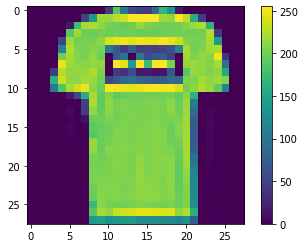

In [8]:
#finally let's look at what some of these images look like!
plt.figure() #make a figure
plt.imshow(train_image[1]) #show the image
plt.colorbar() #color bar
plt.grid(False) #don't show grid
plt.show() #show me

In [9]:
#we want to scale all of our grayscale pixels values to be between 0 and 1. we can do this by dividing each value in 
# the training and testing sets by 255.0 because smaller values will make it easier for the model to process our values
train_images = train_image / 255.0
test_images = test_images / 255.0

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)), #input layer(1)
    keras.layers.Dense(128, activation='relu'), #hidden layer(2)
    keras.layers.Dense(10, activation='softmax') #output layer(3)   10 means that we have 10 classes
])
#keras.sequential: mean that its very basic form of network, information going from left side to right side
#layers.Flatten: does is allow us to take us in shape of (28,28) and flatten all the pixel to 784 pixel in the form of matrix

In [11]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
#adam optimizer is an algorithm performing gradient decent

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6297 - accuracy: 0.7775
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3100 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2742 - accuracy: 0.8986
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2532 - accuracy: 0.9060
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2404 - accuracy: 0.9110
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.228

In [13]:
test_loss , test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('test accuracy:' , test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3267 - accuracy: 0.8845
test accuracy: 0.8845000267028809


In [14]:
predictions = model.predict(test_images)
print(predictions[0])

[6.8592722e-11 3.5364298e-12 2.7985952e-10 4.5095198e-11 2.6567210e-10
 3.3781983e-04 8.3300243e-08 1.6035227e-02 2.4206742e-07 9.8362666e-01]


In [16]:
print(np.argmax(predictions[0]))

9


In [17]:
print(class_names[np.argmax(predictions[1])])

Pullover


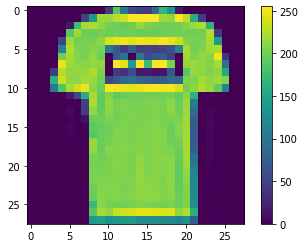

In [18]:
#finally let's look at what some of these images look like!
plt.figure() #make a figure
plt.imshow(train_image[1]) #show the image
plt.colorbar() #color bar
plt.grid(False) #don't show grid
plt.show() #show me

pick a number:45


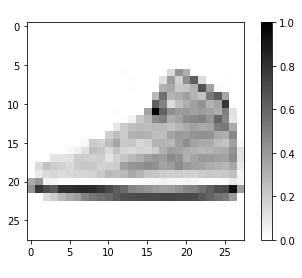

In [22]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model,image,correct_label):
  class_names = ['T-shirt/top','Trovser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label], predicted_class)

def show_image(img,label,guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title('expected:' + label)
  plt.xlabel('Guess:' + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
def get_number():
  while True:
    num = input('pick a number:')
    if num.isdigit():
      num = int(num)
      if 0 <=num <=1000:
        return int(num)
    else:
      print('Try Again')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)